# Trees

## Dataset

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import pickle
import seaborn as sb
import six
import pydotplus
from IPython.display import Image  
from sklearn.tree import export_graphviz
from google.colab import drive
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Mount to Google Drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Load dataset subset with 5 emojis
df = pd.read_csv("/content/gdrive/My Drive/CS3244/Final/Updated/full_train_preprocessed_subset.csv")
df = df.drop(columns=['Unnamed: 0'])

df_val = pd.read_csv("/content/gdrive/My Drive/CS3244/Final/Updated/full_val_preprocessed_subset.csv")
df_val = df_val.drop(columns=['Unnamed: 0'])

df_test = pd.read_csv("/content/gdrive/My Drive/CS3244/Final/Updated/full_test_preprocessed_subset.csv")
df_test = df_test.drop(columns=['Unnamed: 0'])

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound,label
0,1384,Nobody go to Walmart in sulphur,NaN,"['nobody', 'go', 'walmart', 'sulphur']",2,0,1,6,4.333333,0.0,1.0,0.0,0.0,2
1,1384,@emberlhamon @MLidak welcome to the ugly club!!,NaN,"['welcome', 'ugly', 'club']",2,0,1,8,5.125000,0.0,1.0,0.0,0.0,2
2,1384,getting to help coach jr high,NaN,"['getting', 'help', 'coach', 'jr', 'high']",0,0,1,6,4.000000,0.0,1.0,0.0,0.0,2
3,1384,Yo Gotti and Black Youngsta on stage we all th...,NaN,"['yo', 'gotti', 'black', 'youngsta', 'stage', ...",4,0,1,13,3.692308,0.0,1.0,0.0,0.0,2
4,1384,@spenceribarra just making sure I haven't been...,NaN,"['making', 'sure', 'havent', 'replaced']",1,0,1,9,5.333333,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133994,1392,Agape Worshippers their voices are so angelic...,NaN,"['agape', 'worshipper', 'voice', 'angelic', 'g...",3,0,1,12,5.000000,0.0,1.0,0.0,0.0,3
133995,1392,@abike \nHe's a cutie,NaN,"['he', 'cutie']",1,0,1,5,3.400000,0.0,1.0,0.0,0.0,3
133996,1392,@Americooligan thanks,NaN,['thanks'],1,0,1,3,6.666667,0.0,1.0,0.0,0.0,3
133997,1392,Ari's mom braided my hair,NaN,"['aris', 'mom', 'braided', 'hair']",1,0,1,6,3.500000,0.0,1.0,0.0,0.0,3


In [ ]:
# Print size of dataframes
print(df.shape)
print(df_val.shape)
print(df_test.shape)

(133999, 14)
(17223, 14)
(17063, 14)


In [ ]:
# Print labels and annotations
df['label'] = df['label'].map(lambda name: int(float(name)))
print(df['label'].unique())
print(df['annotations'].unique())

df_val['label'] = df_val['label'].map(lambda name: int(float(name)))
print(df_val['label'].unique())
print(df_val['annotations'].unique())

df_test['label'] = df_test['label'].map(lambda name: int(float(name)))
print(df_test['label'].unique())
print(df_test['annotations'].unique())

[2 4 0 1 3]
[1384 1447  186 1381 1392]
[4 2 0 3 1]
[1447 1384  186 1392 1381]
[4 2 0 3 1]
[1447 1384  186 1392 1381]


**5 Chosen emojis**

1381 - 😂

1447 - 🙄

1392 - 😍

186 - ❤️

1384 - 😅

In [ ]:
# Print label counts in each dataset
print("Number of rows per emoji:")
print(df['label'].value_counts())

print("Number of rows per emoji in validation set:")
print(df_val['label'].value_counts())

print("Number of rows per emoji in test set:")
print(df_test['label'].value_counts())

Number of rows per emoji:
0    31384
1    27748
3    27744
4    23842
2    23281
Name: label, dtype: int64
Number of rows per emoji in validation set:
0    4137
3    3671
1    3493
4    3003
2    2919
Name: label, dtype: int64
Number of rows per emoji in test set:
0    3934
3    3619
1    3546
4    3053
2    2911
Name: label, dtype: int64


In [ ]:
# Combine train and validation sets
print(df.shape)
df = df.append(df_val)
df.shape

(133999, 14)


(151222, 14)

In [ ]:
# Fill empty rows in training and test sets
df[['tokens']] = df.loc[:,['tokens']].fillna(value={})
df_test[['tokens']] = df_test.loc[:,['tokens']].fillna(value={})

## TF-IDF

In [ ]:
# Using TF-IDF vectorizer on train set
corpus = df['tokens'].astype(str)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X

<151222x43242 sparse matrix of type '<class 'numpy.float64'>'
	with 551474 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '0001', ..., '트와이스', '헨리', '화양연화onstageepilogue'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


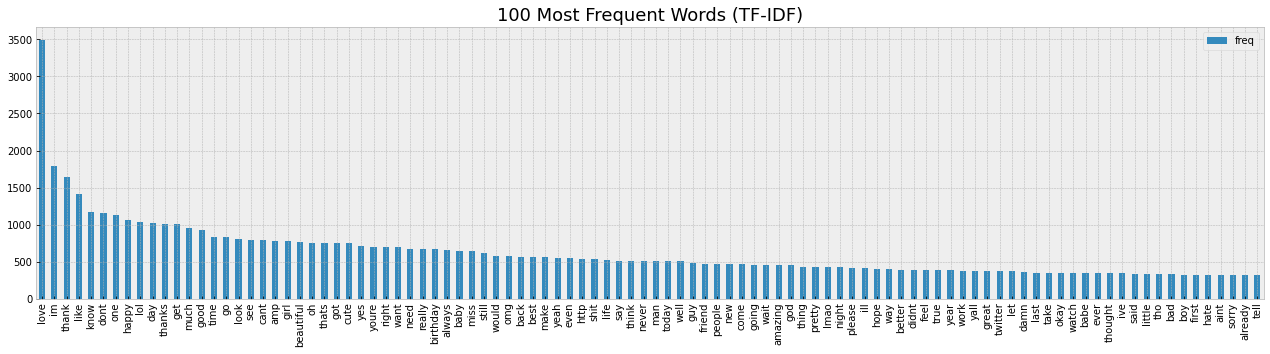

In [ ]:
# Plot 100 most frequent words
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (22.0, 5.0)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 10

pd.DataFrame(X.sum(axis=0).T, index=vectorizer.get_feature_names(), columns=['freq']).sort_values(by='freq', ascending=False).head(100).plot(kind='bar',title="100 Most Frequent Words (TF-IDF)")

1. Most frequent word in the tweets with a very high margin is 'love'. 96th most frequent word is 'hate'.
2. Most of the top 100 words are positive/neutral. Probably because we only have 1 negative emoji. 



In [ ]:
# Using TF-IDF vectorizer on test set
corpus_test = df_test['tokens'].astype(str)
y = vectorizer.transform(corpus_test)
y

<17063x43242 sparse matrix of type '<class 'numpy.float64'>'
	with 57749 stored elements in Compressed Sparse Row format>

In [ ]:
# Set training columns and labels
X_train, y_train = X, df['label']
X_test, y_test = y, df_test['label']

In [ ]:
# Reduce dataset dimensions to 300
transformer = TruncatedSVD(300)
X_train_v2 = transformer.fit_transform(X_train)
X_test_v2 = transformer.transform(X_test)

In [ ]:
X_train

<151222x43242 sparse matrix of type '<class 'numpy.float64'>'
	with 551474 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_v2

array([[ 0.00213838,  0.00204954,  0.02806333, ..., -0.01141865,
        -0.02002224,  0.00243168],
       [ 0.00197962,  0.00075873,  0.0092367 , ...,  0.00071825,
         0.00087579,  0.00672657],
       [ 0.00168973,  0.00171662,  0.01484536, ...,  0.03153229,
         0.0219256 ,  0.00293058],
       ...,
       [ 0.00109392,  0.00105251,  0.01458717, ..., -0.00928247,
         0.05044865, -0.04168466],
       [ 0.00287212,  0.00349245,  0.02962661, ..., -0.01521616,
        -0.02031841, -0.02421588],
       [ 0.00271988,  0.0027715 ,  0.02530063, ..., -0.01177117,
         0.00926414, -0.00760455]])

## Decision tree model

In [ ]:
# Initialize the model
decision_tfidf = DecisionTreeClassifier(random_state=42)

# Fit the model 
clf = decision_tfidf.fit(X_train_v2, y_train)

In [ ]:
# Make predicrions with test set
predicted = clf.predict(X_test_v2)

In [ ]:
# Print evaluation metrics
print("Decision Tree Accuracy with TfidfVectorizer:", accuracy_score(y_test, predicted) * 100, "\n")
print("Decision Tree Classification Report with TfidfVectorizer:\n", classification_report(y_test, predicted))
print("Decision Tree Confusion Matrix with TfidfVectorizer:\n", confusion_matrix(y_test, predicted))

Decision Tree Accuracy with TfidfVectorizer: 33.165328488542464 

Decision Tree Classification Report with TfidfVectorizer:
               precision    recall  f1-score   support

           0       0.36      0.60      0.45      3934
           1       0.30      0.25      0.27      3546
           2       0.26      0.21      0.23      2911
           3       0.40      0.31      0.35      3619
           4       0.28      0.22      0.25      3053

    accuracy                           0.33     17063
   macro avg       0.32      0.32      0.31     17063
weighted avg       0.32      0.33      0.32     17063

Decision Tree Confusion Matrix with TfidfVectorizer:
 [[2376  370  315  585  288]
 [1043  879  593  409  622]
 [ 814  602  624  367  504]
 [1426  408  378 1113  294]
 [ 894  654  519  319  667]]


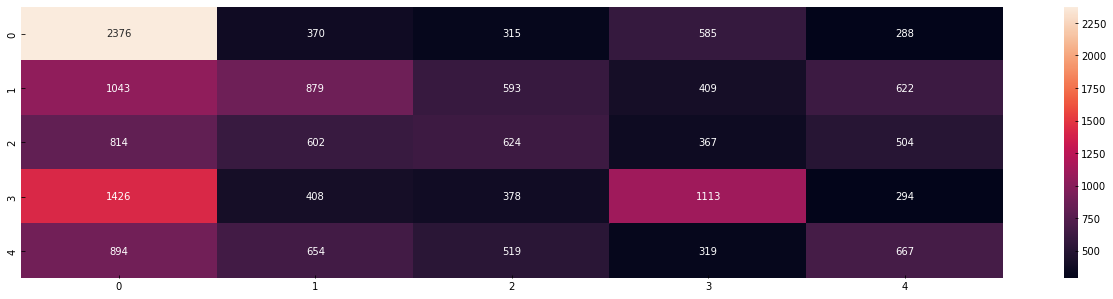

In [ ]:
# Draw confusion matrix
clf_matrix = confusion_matrix(y_test,predicted)  
sb.heatmap(clf_matrix, annot=True, fmt='g')

In [ ]:
# Print text representation of decision tree
text_representation = tree.export_text(decision_tfidf)
print(text_representation)

|--- feature_0 <= 0.02
|   |--- feature_4 <= -0.00
|   |   |--- feature_3 <= -0.00
|   |   |   |--- feature_43 <= 0.00
|   |   |   |   |--- feature_22 <= 0.37
|   |   |   |   |   |--- feature_110 <= 0.06
|   |   |   |   |   |   |--- feature_5 <= -0.00
|   |   |   |   |   |   |   |--- feature_42 <= 0.29
|   |   |   |   |   |   |   |   |--- feature_35 <= 0.45
|   |   |   |   |   |   |   |   |   |--- feature_74 <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_46 <= -0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_46 >  -0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 37
|   |   |   |   |   |   |   |   |   |--- feature_74 >  0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_75 <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |   |   |   |   |   |   |   |--- feature_75 >  0.06
|   |   |   |   |   |   |   |

In [ ]:
# Plot decision tree with graphviz
output_data = six.StringIO()
export_graphviz(decision_tfidf, out_file=output_data,  filled=True, rounded=True, max_depth=30)
tree_graph = pydotplus.graph_from_dot_data(output_data.getvalue())  
Image(tree_graph.create_png())

KeyboardInterrupt: ignored

## Ensemble tree models

### Random Forest

In [ ]:
random_forest_clf = RandomForestClassifier(n_estimators=100)
random_forest_clf.fit(X_train_v2,y_train)

RandomForestClassifier()

In [ ]:
predicted_random_forest = random_forest_clf.predict(X_test_v2)

In [ ]:
print("Random Forest Accuracy with TfidfVectorizer:", accuracy_score(y_test, predicted_random_forest) * 100, "\n")
print("Random Forest Classification Report with TfidfVectorizer:\n", classification_report(y_test, predicted_random_forest))
print("Random Forest Confusion Matrix with TfidfVectorizer:\n", confusion_matrix(y_test, predicted_random_forest))

Random Forest Accuracy with TfidfVectorizer: 38.40473539236945 

Random Forest Classification Report with TfidfVectorizer:
               precision    recall  f1-score   support

           0       0.40      0.68      0.51      3934
           1       0.34      0.31      0.33      3546
           2       0.32      0.23      0.27      2911
           3       0.48      0.37      0.42      3619
           4       0.33      0.25      0.29      3053

    accuracy                           0.38     17063
   macro avg       0.38      0.37      0.36     17063
weighted avg       0.38      0.38      0.37     17063

Random Forest Confusion Matrix with TfidfVectorizer:
 [[2670  277  235  528  224]
 [ 933 1102  525  371  615]
 [ 746  696  681  293  495]
 [1459  350  263 1325  222]
 [ 818  772  445  243  775]]


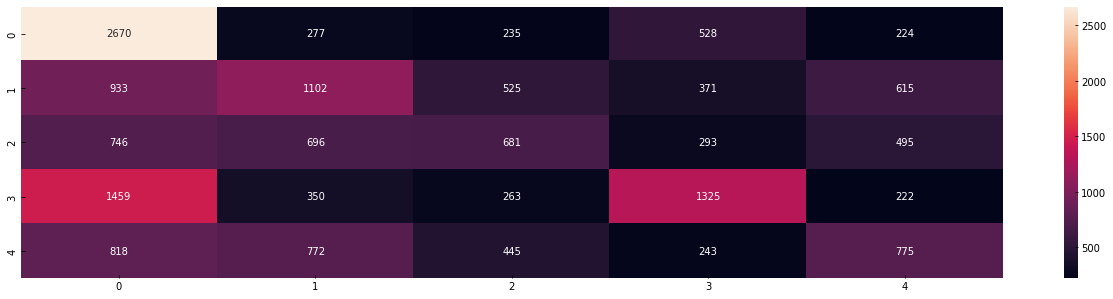

In [ ]:
random_forest_clf_matrix = confusion_matrix(y_test,predicted_random_forest)  
sb.heatmap(random_forest_clf_matrix, annot=True, fmt='g')

### Gradient Boosting Classifier (xgboost)

In [ ]:
xgboost_clf = XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1)
xgboost_clf.fit(X_train_v2, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
predict_xgboost = xgboost_clf.predict(X_test_v2)

In [ ]:
print("Xgboost Accuracy with TfidfVectorizer:", accuracy_score(y_test, predict_xgboost) * 100, "\n")
print("Xgboost Classification Report with TfidfVectorizer:\n", classification_report(y_test, predict_xgboost))
print("Xgboost Confusion Matrix with TfidfVectorizer:\n", confusion_matrix(y_test, predict_xgboost))

Xgboost Accuracy with TfidfVectorizer: 37.994491003926626 

Xgboost Classification Report with TfidfVectorizer:
               precision    recall  f1-score   support

           0       0.40      0.66      0.50      3934
           1       0.35      0.32      0.34      3546
           2       0.34      0.18      0.23      2911
           3       0.43      0.40      0.41      3619
           4       0.33      0.25      0.29      3053

    accuracy                           0.38     17063
   macro avg       0.37      0.36      0.35     17063
weighted avg       0.37      0.38      0.36     17063

Xgboost Confusion Matrix with TfidfVectorizer:
 [[2605  278  169  644  238]
 [ 969 1141  369  493  574]
 [ 777  685  519  410  520]
 [1425  359  156 1443  236]
 [ 815  778  301  384  775]]


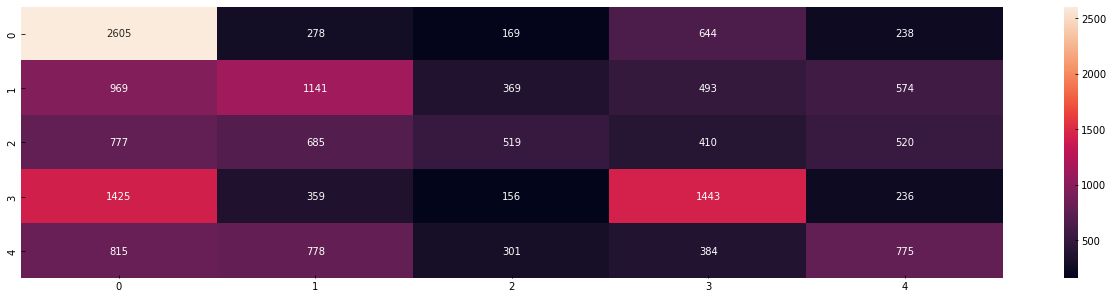

In [ ]:
xgboost_clf_matrix = confusion_matrix(y_test,predict_xgboost)  
sb.heatmap(xgboost_clf_matrix, annot=True, fmt='g')

### Extra-Trees Classifier

In [ ]:
extra_clf = ExtraTreesClassifier(n_estimators=100)
extra_clf.fit(X_train_v2, y_train)

ExtraTreesClassifier()

In [ ]:
predict_extra = extra_clf.predict(X_test_v2)

In [ ]:
print("Extra-trees Accuracy with TfidfVectorizer:", accuracy_score(y_test, predict_extra) * 100, "\n")
print("Extra-trees Classification Report with TfidfVectorizer:\n", classification_report(y_test, predict_extra))
print("Extra-trees Confusion Matrix with TfidfVectorizer:\n", confusion_matrix(y_test, predict_extra))

Extra-trees Accuracy with TfidfVectorizer: 37.777647541463985 

Extra-trees Classification Report with TfidfVectorizer:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50      3934
           1       0.33      0.31      0.32      3546
           2       0.30      0.23      0.26      2911
           3       0.47      0.35      0.40      3619
           4       0.34      0.25      0.29      3053

    accuracy                           0.38     17063
   macro avg       0.37      0.36      0.35     17063
weighted avg       0.37      0.38      0.36     17063

Extra-trees Confusion Matrix with TfidfVectorizer:
 [[2648  301  252  526  207]
 [ 941 1108  563  352  582]
 [ 748  741  661  297  464]
 [1500  386  244 1272  217]
 [ 801  781  474  240  757]]


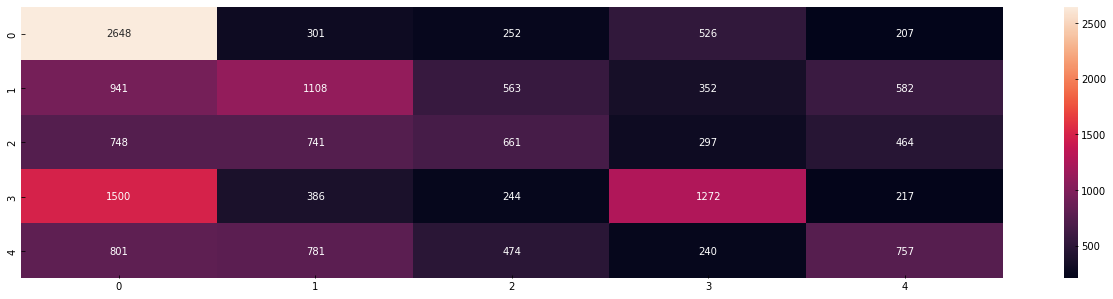

In [ ]:
extra_clf_matrix = confusion_matrix(y_test,predict_extra)  
sb.heatmap(extra_clf_matrix, annot=True, fmt='g')

### Adaptive Boosting Classifier

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train_v2, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
predict_ada = ada_clf.predict(X_test_v2)

In [ ]:
print("Adaptive Boosting Accuracy with TfidfVectorizer:", accuracy_score(y_test, predict_ada) * 100, "\n")
print("Adaptive Boosting Classification Report with TfidfVectorizer:\n", classification_report(y_test, predict_ada))
print("Adaptive Boosting Confusion Matrix with TfidfVectorizer:\n", confusion_matrix(y_test, predict_ada))

Adaptive Boosting Accuracy with TfidfVectorizer: 36.67584832678896 

Adaptive Boosting Classification Report with TfidfVectorizer:
               precision    recall  f1-score   support

           0       0.39      0.66      0.49      3934
           1       0.34      0.32      0.33      3546
           2       0.32      0.17      0.22      2911
           3       0.41      0.37      0.39      3619
           4       0.33      0.23      0.27      3053

    accuracy                           0.37     17063
   macro avg       0.35      0.35      0.34     17063
weighted avg       0.36      0.37      0.35     17063

Adaptive Boosting Confusion Matrix with TfidfVectorizer:
 [[2593  288  178  651  224]
 [ 975 1125  395  505  546]
 [ 811  747  500  400  453]
 [1513  376  185 1353  192]
 [ 835  800  329  402  687]]


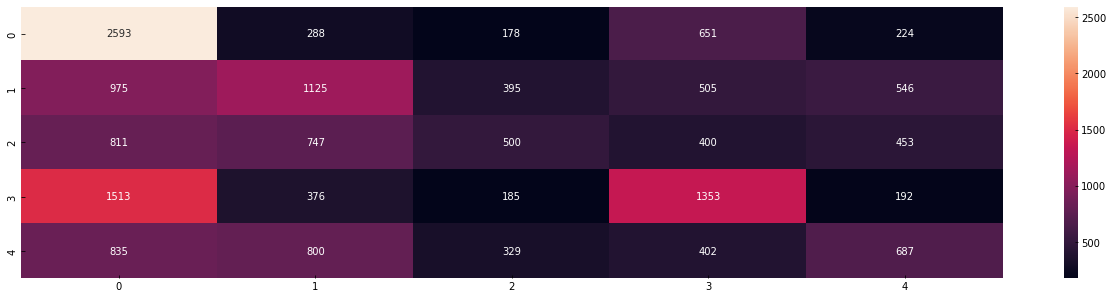

In [ ]:
ada_clf_matrix = confusion_matrix(y_test,predict_ada)  
sb.heatmap(ada_clf_matrix, annot=True, fmt='g')

## Evaluation

**Accuracy scores (TF-IDF):**

1. Decision Tree: 33.16% (1 min)

2. Random Forest: 38.40% (7 mins)

3. XGBoost: 37.99% (24 mins)

4. Extra-trees: 37.77% (5 mins)

5. AdaBoost: 33.67% (13 mins)

# Tuning

### Random Forest

In [ ]:
# Number of trees in the forest
n_estimators = [10, 20, 50, 100, 200, 500]

# Max number of levels in the tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 10)]
max_depth.append(None)

# Min number of samples to split internal node
min_samples_split = [2, 5, 10]

# Min number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 3, 4]

# Criterion to measure quality of split
criterion = ['gini', 'entropy', 'log_loss']

# Max features to consider for best split
max_features = ['sqrt', 'log2', 'auto', 0.2, 0.5, None]

# Create the parameters dictionary
param_dict = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'max_features': max_features
              }


rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_dict, n_iter = 5, cv = 4, scoring = 'accuracy')
rf_random.fit(X_train_v2, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parall

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 22, 34, 46, 58, 71,
                                                      83, 95, 107, 120, None],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         0.2, 0.5, None],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 50, 100, 200,
                                                         500]},
                   scoring='accuracy')

In [ ]:
print("\n The best estimator across all searched params:\n", rf_random.best_estimator_)
print("\n The best score across all searched params:\n", rf_random.best_score_)
print("\n The best parameters across all searched params:\n", rf_random.best_params_)


 The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', max_depth=95, max_features='log2',
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=500)

 The best score across ALL searched params:
 0.38438195648290624

 The best parameters across ALL searched params:
 {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 95, 'criterion': 'entropy'}


In [ ]:
predicted = rf_random.predict(X_test_v2)

In [ ]:
print("Random Forest Accuracy with TfidfVectorizer:", accuracy_score(y_test, predicted) * 100, "\n")
print("Random Forest Classification Report with TfidfVectorizer:\n", classification_report(y_test, predicted))
print("Random Forest Confusion Matrix with TfidfVectorizer:\n", confusion_matrix(y_test, predicted))

Random Forest Accuracy with TfidfVectorizer: 38.81497978081229 

Random Forest Classification Report with TfidfVectorizer:
               precision    recall  f1-score   support

           0       0.40      0.69      0.51      3934
           1       0.34      0.33      0.34      3546
           2       0.32      0.21      0.25      2911
           3       0.48      0.37      0.42      3619
           4       0.36      0.25      0.29      3053

    accuracy                           0.39     17063
   macro avg       0.38      0.37      0.36     17063
weighted avg       0.38      0.39      0.37     17063

Random Forest Confusion Matrix with TfidfVectorizer:
 [[2723  292  218  512  189]
 [ 942 1183  495  381  545]
 [ 786  767  613  294  451]
 [1499  377  211 1343  189]
 [ 818  823  400  251  761]]


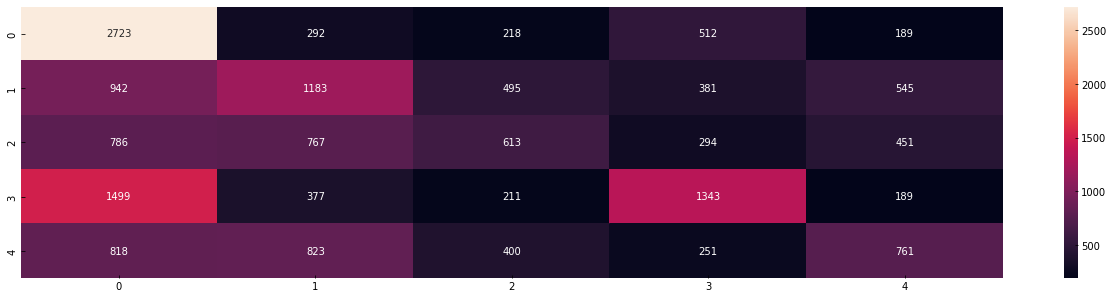

In [ ]:
rf_clf_matrix = confusion_matrix(y_test,predicted)  
sb.heatmap(rf_clf_matrix, annot=True, fmt='g')

In [ ]:
filename = "random_forest_tfidf_subset_tuned.sav"
pickle.dump(rf_random, open(filename, "wb"))